In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [6]:
X_train.shape

(60000, 1, 28, 28)

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
280s - loss: 0.2326 - acc: 0.9343 - val_loss: 0.0818 - val_acc: 0.9742
Epoch 2/10
274s - loss: 0.0739 - acc: 0.9780 - val_loss: 0.0470 - val_acc: 0.9842
Epoch 3/10
266s - loss: 0.0534 - acc: 0.9839 - val_loss: 0.0437 - val_acc: 0.9858
Epoch 4/10
251s - loss: 0.0404 - acc: 0.9876 - val_loss: 0.0410 - val_acc: 0.9867
Epoch 5/10
250s - loss: 0.0340 - acc: 0.9891 - val_loss: 0.0348 - val_acc: 0.9881
Epoch 6/10
263s - loss: 0.0278 - acc: 0.9914 - val_loss: 0.0311 - val_acc: 0.9893
Epoch 7/10
1784s - loss: 0.0235 - acc: 0.9928 - val_loss: 0.0359 - val_acc: 0.9883
Epoch 8/10
256s - loss: 0.0207 - acc: 0.9935 - val_loss: 0.0323 - val_acc: 0.9884
Epoch 9/10
269s - loss: 0.0168 - acc: 0.9944 - val_loss: 0.0305 - val_acc: 0.9900
Epoch 10/10
250s - loss: 0.0144 - acc: 0.9958 - val_loss: 0.0337 - val_acc: 0.9889
CNN Error: 1.11%


In [10]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t

In [56]:
test = cv2.imread("Test_Image10.png")

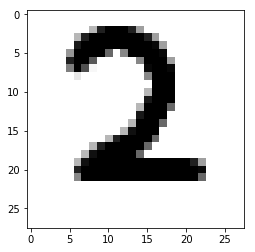

In [57]:
plt.imshow(test)
plt.show()

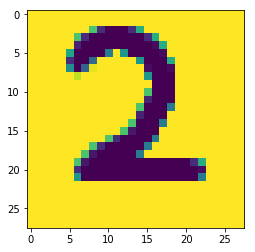

In [58]:
test = cv2.cvtColor( test, cv2.COLOR_RGB2GRAY )
plt.imshow(test)
plt.show()

In [59]:
test = test.reshape(1, 1, 28, 28)
test = cv2.bitwise_not(test)

In [60]:
pred = model.predict_classes(test)
print(pred)

1/1 [==============================] - 0s
[2]
